In [1]:
import pandas as pd

# We'll also import seaborn, a Python graphing library
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns

# import matplotlib and set inline
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import numpy as np
sns.set()

# Bitwidth Comparison

In [256]:
# unipolar quantization
bits = ['1', '2', '3']
accuracy = [58.1, 67.2, 70.2]
runtime = [243.77, 387.21, 609.97]
quant_type_pos = ['unipolar', 'unipolar', 'unipolar']

# bipolar quantization
runtime_neg = [184.07, 271.42, 423.48]#, 2420]
bits_neg = ['1', '2', '3']#, '32']
accuracy_neg = [56.2, 64.0, 68.5]#, 72.7]
quant_type_neg = ['bipolar', 'bipolar', 'bipolar']#, 'full precision']

In [257]:
data_pos = {'Bitwidth': bits, 'Accuracy (top-1)': accuracy, 'Runtime (ms)': runtime, 'Quantization Type': quant_type_pos}
data_neg = {'Bitwidth': bits_neg, 'Accuracy (top-1)': accuracy_neg, 'Runtime (ms)': runtime_neg, 'Quantization Type': quant_type_neg}

In [258]:
df_pos = pd.DataFrame(data_pos)
df_neg = pd.DataFrame(data_neg)
df = pd.concat([df_pos, df_neg], ignore_index=True)

In [259]:
df

,Bitwidth,Accuracy (top-1),Runtime (ms),Quantization Type
0,1,58.1,243.77,unipolar
1,2,67.2,387.21,unipolar
2,3,70.2,609.97,unipolar
3,1,56.2,184.07,bipolar
4,2,64.0,271.42,bipolar
5,3,68.5,423.48,bipolar


In [260]:
neg_acc = df.loc[df['Quantization Type'] == 'bipolar']['Accuracy (top-1)']
pos_acc = df.loc[df['Quantization Type'] == 'unipolar']['Accuracy (top-1)']

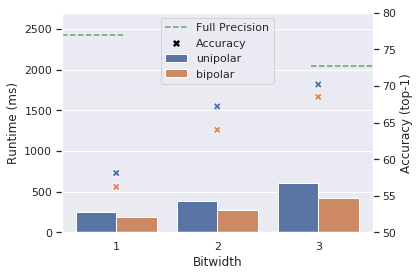

In [264]:

#counts = np.array([56000,900,5000,6000,30000,3500,300]).astype(float)
#perc =  counts/counts.sum()
#df = pd.DataFrame({"range": list("ABCDEFG"),"count":counts, "perc":perc})

fig = plt.figure()
#ax = df['runtime'].plot(kind="bar", alpha=0.7)
ax = sns.barplot(x='Bitwidth', y='Runtime (ms)', hue='Quantization Type', data=df)
ax.set_ylim([0,2700])
#ax = sns.scatterplot(x='Runtime (ms)', y='Accuracy (top-1)', size='Bitwidth', hue='Quantization Type', data=df)
#ax.set(xlabel='Activation Bits', ylabel='Runtime (ms)')
ax2 = ax.twinx()
ax2.grid(False)
ax2 = sns.scatterplot(x='Bitwidth', y='Accuracy (top-1)', hue='Quantization Type', data=df, marker='X', s=60)
ax2.get_legend().remove()
ax2.set_ylim([50, 80])
ax.axhline(y=2420, color='g', xmax=0.2, linestyle='--', label="Full Precision")
ax2.axhline(y=72.7, color='g', xmin=0.8, linestyle='--')
ax.scatter(x=0, y=0, alpha=1, marker='X', color='black', label='Accuracy', s=50, linewidths=.01)
ax.legend(loc='upper center')
#ax2.plot(ax.get_xticks(),pos_acc,marker='o', c='navy', linewidth=2)
#ax2.plot(ax.get_xticks(),neg_acc,marker='o', c='yellow', linewidth=2)

#ax.set_xticklabels(df['Bitwidth'], rotation=0)
#ax.set_ylim(0,1.3*df["Runtime (ms)"].max())
#ax2.set_ylim(0.8*df["Accuracy (top-1)"].min(),1.3*df["Accuracy (top-1)"].max())
#ax2.set(ylabel='Imagenet Top-1 Accuracy')
#plt.legend()
plt.tight_layout()
plt.savefig('/data/jwfromm/bitwidth_comp.png', dpi=900)
plt.show()

# Effect of optimizations on speedup

In [266]:
optimizations = ['unoptimized', 'tiling', 'vectorize', 'parallel', 'layer fusion']
speedups = [0.5, 0.8, 0.9, 2.0, 10.0]

In [267]:
data = {'Optimization': optimizations, 'Relative Speedup': speedups}

In [268]:
df = pd.DataFrame(data)

In [269]:
df

,Optimization,Relative Speedup
0,unoptimized,0.5
1,tiling,0.8
2,vectorize,0.9
3,parallel,2.0
4,layer fusion,10.0


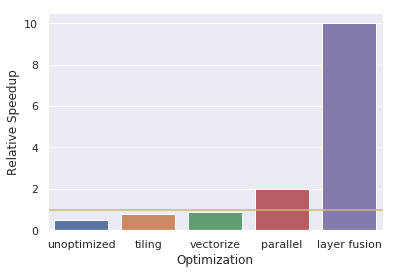

In [270]:
# This plot sucks
ax = sns.barplot(x='Optimization', y='Relative Speedup', data=df)
ax.axhline(y=1.0, color='y')
plt.savefig('/data/jwfromm/optimizations.png', dpi=900)
plt.show()

# Layer wise speed-ups on VGG

In [271]:
layers = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

#N = 1
bits = (np.zeros(len(layers)) + 1).astype(np.int32)
speedup = [20.1, 16.9, 32.6, 33.7, 16.1, 34.6, 35.6, 10.6, 10.6, 10.8, 20.1, 3.1, 0.7]
n1_data = {'Layer': layers, 'Runtime (ms)': speedup, 'Bitwidth': bits}
n1_df = pd.DataFrame(n1_data)

# N = 2
bits = (np.zeros(len(layers)) + 2).astype(np.int32)
speedup = [20.1, 31.9, 58.6, 59.8, 28.9, 56.2, 57.0, 16.9, 16.8, 16.9, 20.3, 3.2, 0.8]
n2_data = {'Layer': layers, 'Runtime (ms)': speedup, 'Bitwidth': bits}
n2_df = pd.DataFrame(n2_data)

#N = 3
bits = (np.zeros(len(layers)) + 3).astype(np.int32)
speedup = [20.3, 53.1, 99.9, 101.2, 46.4, 91.7, 92.5, 26.8, 26.9, 27.1, 20.8, 3.2, 0.9]
n3_data = {'Layer': layers, 'Runtime (ms)': speedup, 'Bitwidth': bits}
n3_df = pd.DataFrame(n3_data)

#N = 32
#bits = (np.zeros(len(layers)) + 32).astype(np.int32)
#speedup = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
#n32_data = {'Layer': layers, 'Relative Speedup': speedup, 'Bitwidth': bits}
#n32_df = pd.DataFrame(n32_data)

In [272]:
joint_df = pd.concat([n1_df, n2_df, n3_df], ignore_index=True)

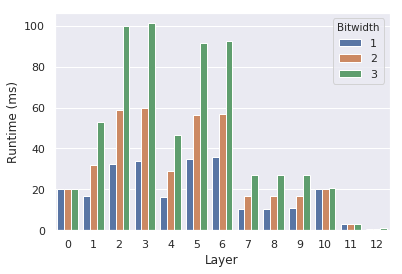

In [273]:
ax = sns.barplot(x='Layer', y='Runtime (ms)', hue='Bitwidth', data=joint_df)
plt.savefig('/data/jwfromm/layerwise_speed.png', dpi=900)
plt.show()

# Polarity Comparison

In [2]:
# Here we consider 3x3 conv of fire layer 1.
# Input shape: [1, 56, 56, 32], Filter shape: [3, 3, 64, 64]
# Processor max throughput is 4.8 GHz
# Op count (standard): 56*56*3*3*64*64 = 115.6 MFlops -> 24 ms for perfect execution (actual is 26ms)
# Op count (bipolar): standard / 32 = 8 MBops -> .8 ms (actual is 3 ms)
# Op count (unipolar): standard / 16 = 16 MBops -> 1.6 ms (actual is 4 ms)
# For bitserial ops its obvious that memory movement dominates. Unipolar requires no additional memory movement over bipolar
# so its only marginally slower. Thus, in most cases unipolar quantization is desirable.
standard_ops = 56*56*3*3*64*64
bipolar_ops = standard_ops / 32
unipolar_ops = standard_ops / 16

standard_runtime = 26.2
bipolar_runtime = 3.0
unipolar_runtime = 4.0

standard_hyp = 24
bipolar_hyp = .8
unipolar_hyp = 1.6

standard = pd.DataFrame([{'class': 'baseline', 'ops': standard_ops, 'runtime': standard_runtime}])
bipolar = pd.DataFrame([{'class': 'bipolar', 'ops': bipolar_ops, 'runtime': bipolar_runtime}])
unipolar = pd.DataFrame([{'class': 'unipolar', 'ops': unipolar_ops, 'runtime': unipolar_runtime}])

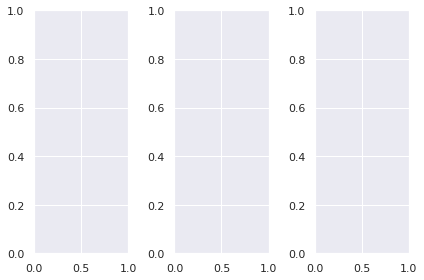

In [13]:
fig, axs = plt.subplots(ncols=3)
fig.tight_layout()

In [14]:
s = sns.barplot(data=standard, y='runtime', ax=axs[0])
s.axhline(y=standard_hyp, color='y')
s.set_ylabel("Runtime (ms)")
s.set_title("Baseline")

Text(0.5, 1, 'Baseline')

In [15]:
u = sns.barplot(data=unipolar, y='runtime', ax=axs[1])
u.axhline(y=unipolar_hyp, color='y')
u.set_ylabel("")
u.set_title("Unipolar")
u.set(ylim=(0, 5))

[(0, 5)]

In [16]:
b = sns.barplot(data=bipolar, y='runtime', ax=axs[2])
b.axhline(y=bipolar_hyp, color='y')
b.set_ylabel("")
b.set_title("Bipolar")
b.set(ylim=(0, 5))

[(0, 5)]

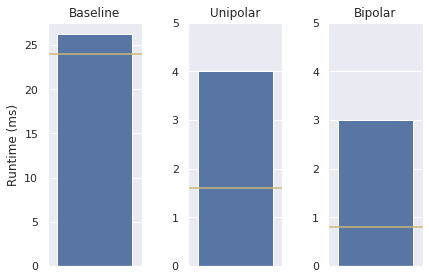

In [17]:
fig

In [37]:
fig.savefig('/data/jwfromm/polarity.png', dpi=900, bbox_inches='tight')

# Unfused Cost

In [26]:
# In this plot we want to show the per layer breakdown of inference time including interlayer ops. Maybe we do bar chart for ms of layer
# on one y axis and other axis is % of runtime that increases from left to right.
names = ['0', '1', '1g', '2', '2g', '3', '3g', '4', '4g', '5', '5g', '6', '6g', '7', '7g', '8', '8g', 'out', 'outg']
runtime = [9.3, 6.7, 6.5, 7, 6.5, 10.7, 11.4, 3.4, 3.0, 4.8, 4.6, 5.7, 4.66, 8.1, 5.9, 1.9, 1.5, 1.6, .3]
glue = ['g' in n for n in names]
glue = ['Glue Layer' if g else 'Bitserial Layer' for g in glue]
glue_effect = []
delta_sum = 0
for i in range(len(names)):
    name, time = names[i], runtime[i]
    if 'g' in name:
        delta = time / sum(runtime)
        delta_sum += delta
        glue_effect.append(delta_sum)
            
pure_name = []
for i in range(len(names)):
    if 'g' in names[i]:
        pure_name.append(pure_name[i-1])
    else:
        pure_name.append(names[i])
        
last_val = glue_effect[-1]
for i in range(len(np.unique(pure_name)) - len(glue_effect)):
    glue_effect.append(last_val)        

In [27]:
# Make dataframe
unfused_df = pd.DataFrame({'name': pure_name, 'runtime': runtime, 'Layer Type': glue})
cumul_df = pd.DataFrame({'name': range(len(glue_effect)), 'cumul': glue_effect})

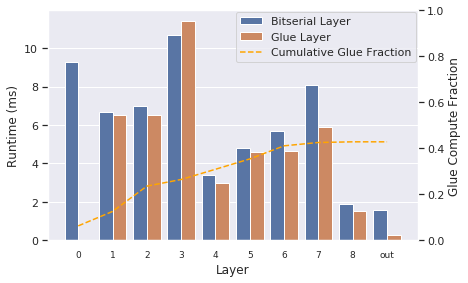

In [38]:
from matplotlib.lines import Line2D
fig = plt.figure()
g = sns.barplot(x='name', y='runtime', hue='Layer Type', data=unfused_df)
plt.tight_layout()
g.set_xticklabels(g.get_xticklabels(), fontsize=9)
g.set_xlabel('Layer')
g.set_ylabel('Runtime (ms)')
g.legend_.remove()

g2 = g.twinx()
g2.grid(False)
g2 = sns.lineplot(x='name', y='cumul', data=cumul_df, label='Cumulative Glue Fraction')
g2.set_ylim(0, 1)
g2.lines[0].set_linestyle('--')
g2.lines[0].set_c('orange')
g2.set_ylabel("Glue Compute Fraction")
g2.legend_.remove()

fig.legend(bbox_to_anchor=[.975, .960])
fig.savefig('/data/jwfromm/unfused_cost.png', dpi=900)#, bbox_inches='tight')

# Glue Breakdown

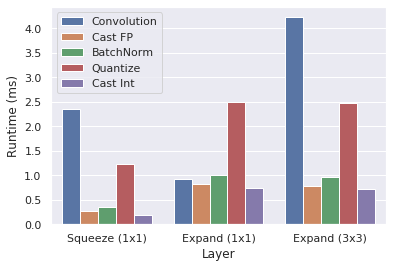

In [44]:
# Here we break down the costs in the first fire layer of squeezenet.
squeeze_1x1_conv = 2.36
squeeze_1x1_cast_fp = .27
squeeze_1x1_bn = .35
squeeze_1x1_quantize = 1.23
squeeze_1x1_cast_int = .19

expand_1x1_conv = .92
expand_1x1_cast_fp = .83
expand_1x1_bn = 1.0
expand_1x1_quantize = 2.49
expand_1x1_cast_int = .74

expand_3x3_conv = 4.23
expand_3x3_cast_fp = .79
expand_3x3_bn = .97
expand_3x3_quantize = 2.47
expand_3x3_cast_int = .73

concat = 1.43

times = [squeeze_1x1_conv, squeeze_1x1_cast_fp, squeeze_1x1_bn, squeeze_1x1_quantize, squeeze_1x1_cast_int,
         expand_1x1_conv, expand_1x1_cast_fp, expand_1x1_bn, expand_1x1_quantize, expand_1x1_cast_int,
         expand_3x3_conv, expand_3x3_cast_fp, expand_3x3_bn, expand_3x3_quantize, expand_3x3_cast_int]
layer = ['Squeeze (1x1)'] * 5 + ['Expand (1x1)'] * 5 + ['Expand (3x3)'] * 5
op_type = ['Convolution', 'Cast FP', 'BatchNorm', 'Quantize', 'Cast Int'] * 3

glue_df = pd.DataFrame({'Runtime (ms)': times, 'Layer': layer, 'Type': op_type})

g = sns.barplot(x='Layer', y="Runtime (ms)", data=glue_df, hue='Type')
g.legend(title="")

In [48]:
g.get_figure().savefig('/data/jwfromm/glue_breakdown.png', dpi=900)

# Scheduling Effect

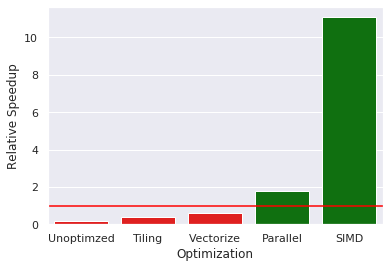

In [74]:
# Here we examine the speedups of a fused bitserial squeezenet with various optimizations applied.
baseline = 719.9
no_schedule = 4604.4
fully_optimized = 67.6
# Speedups. Note that popcount here means using an instruction that utilizes the full SIMD register size on rpi.
parallel = 3
vectorize = 1.5
popcount = 6.3
tile = 1.25
autotune = 2.0

# Relative runtime
unopt_rel = baseline / no_schedule
tile_rel = (unopt_rel * tile * autotune)
vectorize_rel = tile_rel * vectorize
parallel_rel = vectorize_rel * parallel
popcount_rel = parallel_rel * popcount

names = ['Unoptimized', 'Tiling', 'Vectorize', 'Parallel', 'SIMD']
rel_speedup = [unopt_rel, tile_rel, vectorize_rel, parallel_rel, popcount_rel]
fast = [r > 1.0 for r in rel_speedup]
fast = ['green' if r else 'red' for r in fast]

sched_df = pd.DataFrame({'Optimization': names, 'Relative Speedup': rel_speedup, 'Fast': fast})

g = sns.barplot(x='Optimization', y='Relative Speedup', data=sched_df, palette=fast)

g.axhline(y=1.0, color='red')

In [75]:
g.get_figure().savefig('/data/jwfromm/sched_speed.png', dpi=900)

# Bitwidth runtime

In [97]:
# This figure is just a per layer runtime with 1, 2, and 3 bit activations. Nothing fancy.(all unipolar)
onebit = [9.9, 
          sum([3.28, 1.88, 4.04]),
          sum([2.89, 1.03, 4.02]), 
          sum([3.95, 1.37, 8.8]), 
          sum([1.11, .38, 2.0]), 
          sum([1.34, .65, 3.24]), 
          sum([2.18, .62, 3.14]),
          sum([4.2, 1.49, 4.04]),
          sum([.72, .20, 1.07])]

twobit = [10.5, 
          sum([4.51, 1.84, 8.12]),
          sum([3.54, 1.76, 8.18]),
          sum([6.59, 3.58, 19.4]),
          sum([1.87, .68, 3.87]),
          sum([2.02, 1.08, 5.9]),
          sum([2.08, 1.09, 6.0]),
          sum([2.07, 1.25, 7.82]),
          sum([1.0, .33, 2.05])]

threebit = [10.74, 
            sum([5.97, 2.22, 11.69]),
            sum([4.74, 2.23, 11.7]),
            sum([4.74, 3.49, 22.44]),
            sum([2.37, .91, 5.68]),
            sum([2.97, 1.41, 8.89]),
            sum([4.0, 1.37, 8.55]),
            sum([3.99, 1.7, 11.14]),
            sum([1.29, .46, 2.85])]

layer_index = range(len(onebit))

one_df = pd.DataFrame({'Runtime (ms)': onebit, 'Layer': layer_index, 'Quantization': '1A1W'})
two_df = pd.DataFrame({'Runtime (ms)': twobit, 'Layer': layer_index, 'Quantization': '2A1W'})
three_df = pd.DataFrame({'Runtime (ms)': threebit, 'Layer': layer_index, 'Quantization': '3A1W'})

merge_df = pd.concat([one_df, two_df, three_df])

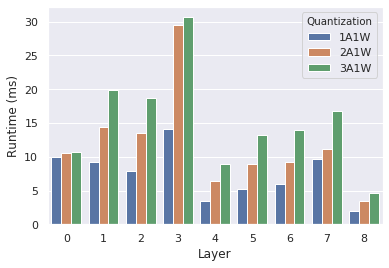

In [101]:
g = sns.barplot(x='Layer', y='Runtime (ms)', hue='Quantization', data=merge_df)

In [102]:
g.get_figure().savefig('/data/jwfromm/quant_layer_speed.png', dpi=900)

In [103]:
baseline = [10.5,
            sum([8.08, 5.13, 21.79]),
            sum([10.9, 5.11, 21.79]),
            sum([11.73, 17.35, 104.53]),
            sum([5.21, 30.7, 28.4]),
            sum([9.03, 8.5, 87.67]),
            sum([13.84, 8.77, 88.12]),
            sum([13.8, 11.22, 115.25]),
            sum([4.93, 3.26, 23.2])]

one_df = pd.DataFrame({'Relative Speedup': np.asarray(baseline) / np.asarray(onebit), 'Layer': layer_index, 'Quantization': '1A1W'})
two_df = pd.DataFrame({'Relative Speedup': np.asarray(baseline) / np.asarray(twobit), 'Layer': layer_index, 'Quantization': '2A1W'})
three_df = pd.DataFrame({'Relative Speedup': np.asarray(baseline) / np.asarray(threebit), 'Layer': layer_index, 'Quantization': '3A1W'})
baseline_df = pd.DataFrame({'Relative Speedup': np.asarray(baseline) / np.asarray(baseline), 'Layer': layer_index, 'Quantization': 'FP32'})

merge_df = pd.concat([one_df, two_df, three_df, baseline_df])

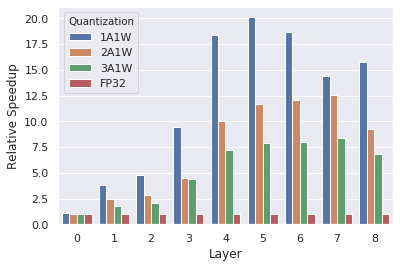

In [105]:
g = sns.barplot(x='Layer', y='Relative Speedup', hue='Quantization', data=merge_df)

In [106]:
g.get_figure().savefig('/data/jwfromm/quant_layer_rel.png', dpi=900)

# Shiftnorm Fusion

In [111]:
# In this figure we compare the runtime of squeezenet when shiftnorm is fused into the preceding convolution (giving memory benefits)
# and wehen its left unfused. (unipolar)

onebit_fused = 67.6
twobit_fused = 111.9
threebit_fused = 155.1

onebit_unfused = 86.04
twobit_unfused = 122.6
threebit_unfused = 158.8

fused = [onebit_fused, twobit_fused, threebit_fused]
unfused = [onebit_unfused, twobit_unfused, threebit_unfused]
names = ["1A1W", "2A1W", "3A1W"]

fused_df = pd.DataFrame({"Runtime (ms)": fused, "Quantization": names, "Type": "Fused"})
unfused_df = pd.DataFrame({"Runtime (ms)": unfused, "Quantization": names, "Type": "Unfused"})

merged_df = pd.concat([fused_df, unfused_df])

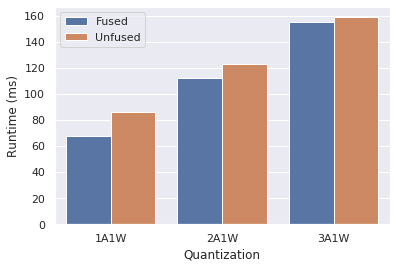

In [112]:
g = sns.barplot(x="Quantization", y="Runtime (ms)", hue="Type", data=merged_df)
g.legend(title="")

In [113]:
g.get_figure().savefig('/data/jwfromm/shiftnorm_fusion.png', dpi=900)